# **FEATURE SELECTION**
# 🏴

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Prepare  Data**
# 🚘

In [2]:
import pandas as pd
out_df=pd.read_csv("/content/combined_otu_data.tsv", sep='\t')
out_df

,name,taxonomy_id,taxonomy_lvl,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
0,Bacteroides xylanisolvens,2057,S,3232092,0.11391,383411,0.01311,63773,0.00160,204219,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
1,Bacteroides finegoldii,151,S,851026,0.02999,34049,0.00116,17527,0.00044,51546,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
2,Bacteroides ovatus,2098,S,631604,0.02226,195250,0.00668,53197,0.00134,4002970,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
3,Bacteroides sp902362375,104,S,499300,0.01760,117253,0.00401,14670,0.00037,85542,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
4,Bacteroides nordii,546,S,123744,0.00436,27246,0.00093,8643,0.00022,170255,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,Campylobacter_D coli_B,3304,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4626,Helicobacter pylori_BU,2194,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4627,Methanobacterium sp000499765,58,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4628,Campylobacter fetus,1077,S,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


In [3]:
rmv_col=["taxonomy_id",	"taxonomy_lvl"]
imp_col=out_df.drop(rmv_col, axis=1)
imp_col

,name,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,SRR32732807.bracken.out_frac,SRR32732808.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
0,Bacteroides xylanisolvens,3232092,0.11391,383411,0.01311,63773,0.00160,204219,0.00586,1464145,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
1,Bacteroides finegoldii,851026,0.02999,34049,0.00116,17527,0.00044,51546,0.00148,102643,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
2,Bacteroides ovatus,631604,0.02226,195250,0.00668,53197,0.00134,4002970,0.11494,1331243,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
3,Bacteroides sp902362375,499300,0.01760,117253,0.00401,14670,0.00037,85542,0.00246,234381,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
4,Bacteroides nordii,123744,0.00436,27246,0.00093,8643,0.00022,170255,0.00489,31901,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,Campylobacter_D coli_B,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4626,Helicobacter pylori_BU,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4627,Methanobacterium sp000499765,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
4628,Campylobacter fetus,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


In [4]:
imp_col.index=out_df['name'].values
imp_col # makes the row labels (index) of imp_col equal to the values in the name column of out_df.

,name,SRR32732804.bracken.out_num,SRR32732804.bracken.out_frac,SRR32732805.bracken.out_num,SRR32732805.bracken.out_frac,SRR32732806.bracken.out_num,SRR32732806.bracken.out_frac,SRR32732807.bracken.out_num,SRR32732807.bracken.out_frac,SRR32732808.bracken.out_num,...,SRR32733696.bracken.out_num,SRR32733696.bracken.out_frac,SRR32733697.bracken.out_num,SRR32733697.bracken.out_frac,SRR32733698.bracken.out_num,SRR32733698.bracken.out_frac,SRR32733699.bracken.out_num,SRR32733699.bracken.out_frac,SRR32733700.bracken.out_num,SRR32733700.bracken.out_frac
Bacteroides xylanisolvens,Bacteroides xylanisolvens,3232092,0.11391,383411,0.01311,63773,0.00160,204219,0.00586,1464145,...,135885,0.00387,61316,0.00147,71793,0.00174,93594,0.00320,195599,0.00405
Bacteroides finegoldii,Bacteroides finegoldii,851026,0.02999,34049,0.00116,17527,0.00044,51546,0.00148,102643,...,23166,0.00066,16353,0.00039,262154,0.00634,215860,0.00738,29743,0.00062
Bacteroides ovatus,Bacteroides ovatus,631604,0.02226,195250,0.00668,53197,0.00134,4002970,0.11494,1331243,...,353907,0.01008,5248,0.00013,245473,0.00594,28510,0.00097,409488,0.00848
Bacteroides sp902362375,Bacteroides sp902362375,499300,0.01760,117253,0.00401,14670,0.00037,85542,0.00246,234381,...,54273,0.00155,4176,0.00010,37103,0.00090,8360,0.00029,67425,0.00140
Bacteroides nordii,Bacteroides nordii,123744,0.00436,27246,0.00093,8643,0.00022,170255,0.00489,31901,...,87856,0.00250,2923,0.00007,37388,0.00090,14192,0.00048,27676,0.00057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,Campylobacter_D coli_B,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Helicobacter pylori_BU,Helicobacter pylori_BU,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Methanobacterium sp000499765,Methanobacterium sp000499765,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000
Campylobacter fetus,Campylobacter fetus,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,...,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000


In [5]:
num_columns =[col for col in imp_col.columns if col.endswith('_num')]
brack_df = imp_col[num_columns]
brack_df

,SRR32732804.bracken.out_num,SRR32732805.bracken.out_num,SRR32732806.bracken.out_num,SRR32732807.bracken.out_num,SRR32732808.bracken.out_num,SRR32732809.bracken.out_num,SRR32732810.bracken.out_num,SRR32732811.bracken.out_num,SRR32732813.bracken.out_num,SRR32732814.bracken.out_num,...,SRR32733691.bracken.out_num,SRR32733692.bracken.out_num,SRR32733693.bracken.out_num,SRR32733694.bracken.out_num,SRR32733695.bracken.out_num,SRR32733696.bracken.out_num,SRR32733697.bracken.out_num,SRR32733698.bracken.out_num,SRR32733699.bracken.out_num,SRR32733700.bracken.out_num
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
brack_df.columns = brack_df.columns.str.extract(r'([^\.]+)\.bracken\.out_num')[0]
brack_df # to remove " bracken.out_num " extension----> to clean column name

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
brack_df.index = out_df['name'].values
brack_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
brack_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Campylobacter_D coli_B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Helicobacter pylori_BU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Methanobacterium sp000499765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campylobacter fetus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import pandas as pd

# Assume brack_num_df is your DataFrame
# Example: brack_num_df = pd.read_csv('your_file.csv', index_col=0)

# Step 1: Convert counts to presence/absence (1 if count > 0, else 0)
presence_absence = (brack_df > 0).astype(int)#Creates a Boolean DataFrame (True if value > 0, False otherwise). Converts True → 1 and False → 0
#
# Step 2: Calculate prevalence (proportion of samples where species is present)
prevalence = presence_absence.mean(axis=1)

# Step 3: Filter species with prevalence
threshold = 0.9
selected_species = prevalence[prevalence > threshold].index

# Step 4: Filter the original DataFrame to include only selected species
filtered_df = brack_df.loc[selected_species]

# Step 5: Output the filtered table
print(f"Filtered table for species with prevalence > {threshold}:")
print(filtered_df)

# Optionally, save the filtered table to a CSV file
# filtered_df.to_csv('filtered_species_prevalence_above_10_percent.csv')

Filtered table for species with prevalence > 0.9:
0                          SRR32732804  SRR32732805  SRR32732806  SRR32732807  \
Bacteroides xylanisolvens      3232092       383411        63773       204219   
Bacteroides finegoldii          851026        34049        17527        51546   
Bacteroides ovatus              631604       195250        53197      4002970   
Bacteroides sp902362375         499300       117253        14670        85542   
Bacteroides nordii              123744        27246         8643       170255   
...                                ...          ...          ...          ...   
Kosakonia cowanii                    0          236            0          791   
Leptotrichia wadei                   0           40          201           84   
Bruticola sp004554425                0          238            0          416   
MGYG000004312                        0          113          281           15   
Prevotella sp900769055               0            0        

In [10]:
brack_num_df=filtered_df
brack_num_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosakonia cowanii,0,236,0,791,389,94,102,305,371,39,...,1006,370,19,22,278,14,487,313,228,666
Leptotrichia wadei,0,40,201,84,87,25,55,54,89,0,...,309,157,12,35,53,0,146,15,27,178
Bruticola sp004554425,0,238,0,416,279,102,655,340,1418,211,...,40,32,849,0,553,393,225,168,175,156
MGYG000004312,0,113,281,15,0,634,135,273,46,215,...,693,12,82,127,100,30,0,362,157,34


# **Threshold Applied**
# ❄

In [11]:
import pandas as pd
import numpy as np


# Step 1: Prevalence Filter (species present in at least 20% of samples)
min_samples = int(0.2 * brack_num_df.shape[1])  # 20% of 851 = 171 samples
non_zero_counts = (brack_num_df > 0).sum(axis=1)  # Count non-zero samples per species
prevalence_filtered_df = brack_num_df[non_zero_counts >= min_samples]
prevalence_filtered_df

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosakonia cowanii,0,236,0,791,389,94,102,305,371,39,...,1006,370,19,22,278,14,487,313,228,666
Leptotrichia wadei,0,40,201,84,87,25,55,54,89,0,...,309,157,12,35,53,0,146,15,27,178
Bruticola sp004554425,0,238,0,416,279,102,655,340,1418,211,...,40,32,849,0,553,393,225,168,175,156
MGYG000004312,0,113,281,15,0,634,135,273,46,215,...,693,12,82,127,100,30,0,362,157,34


In [12]:
non_zero_counts

,0
Bacteroides xylanisolvens,846
Bacteroides finegoldii,849
Bacteroides ovatus,847
Bacteroides sp902362375,846
Bacteroides nordii,847
...,...
Kosakonia cowanii,811
Leptotrichia wadei,776
Bruticola sp004554425,767
MGYG000004312,781


In [13]:
# Step 2: Abundance Filter ( mean relative abundance >= 0.0001)
# Calculate relative abundance (normalize by sample total)
relative_abundance = prevalence_filtered_df.div(prevalence_filtered_df.sum(axis=0), axis=1)#divides each entry in a column by that column’s sum
# Compute mean relative abundance across samples for each species
mean_relative_abundance = relative_abundance.mean(axis=1) #takes the mean across columns (across all samples) for each row (species).
mean_relative_abundance

,0
Bacteroides xylanisolvens,0.012341
Bacteroides finegoldii,0.003372
Bacteroides ovatus,0.016068
Bacteroides sp902362375,0.003865
Bacteroides nordii,0.001303
...,...
Kosakonia cowanii,0.000009
Leptotrichia wadei,0.000002
Bruticola sp004554425,0.000009
MGYG000004312,0.000005


In [14]:
# Filter species with mean relative abundance >= 0.0001
abundance_threshold =0.0001#keeps species whose average relative abundance ≥ 0.0001 across samples
filtered_otu_df = prevalence_filtered_df[mean_relative_abundance >= abundance_threshold]
filtered_otu_df # cutoff value (0.01%) for filtering species.

,SRR32732804,SRR32732805,SRR32732806,SRR32732807,SRR32732808,SRR32732809,SRR32732810,SRR32732811,SRR32732813,SRR32732814,...,SRR32733691,SRR32733692,SRR32733693,SRR32733694,SRR32733695,SRR32733696,SRR32733697,SRR32733698,SRR32733699,SRR32733700
Bacteroides xylanisolvens,3232092,383411,63773,204219,1464145,106125,274709,232809,1179323,1384180,...,515110,483829,192112,5141498,885775,135885,61316,71793,93594,195599
Bacteroides finegoldii,851026,34049,17527,51546,102643,8398,63793,45654,137449,1531351,...,93588,47202,279165,158712,335456,23166,16353,262154,215860,29743
Bacteroides ovatus,631604,195250,53197,4002970,1331243,101814,622567,800555,2510966,615396,...,1273619,625157,260231,1051579,323376,353907,5248,245473,28510,409488
Bacteroides sp902362375,499300,117253,14670,85542,234381,15628,98329,120593,384453,385922,...,184016,100142,43224,263730,103097,54273,4176,37103,8360,67425
Bacteroides nordii,123744,27246,8643,170255,31901,3207,37458,3211,56297,17552,...,102020,6228,59793,13324,14348,87856,2923,37388,14192,27676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Collinsella tanakaei,36,64,171,0,19,119,45464,3494,0,0,...,36,0,112,73,61,35,33,123,27,49
Bifidobacterium infantis,18,2830,38,0,13534,50443,21579,5558,54599,542,...,29020,90956,46,314443,26508,32438,12,5456,10272,186136
UBA7185 sp900556545,96,3257,23401,55,3687,637,418,277,117,96,...,1619,1912,796,669,1591,8064,177,8727,710,108
Prevotella sp900544825,0,49,0,362,130,51,4418203,283294,172,0,...,453,157,1689,0,80,426,99,290,268878,192


# CLR Transformation
# ♎

In [15]:
import pandas as pd
import numpy as np

# Step 3: Add pseudocount of 1 to handle zeros
otu_df_pseudo = filtered_otu_df + 1

# Step 4: CLR transformation function
def clr_transform(df):
    # Compute geometric mean for each sample (column)
    gm = np.exp(np.log(df).mean(axis=0))
    # Apply CLR: log(x_i / GM)
    clr_df = np.log(df / gm) #Divide each value in a column by that column’s geometric mean.
    return clr_df

#np.log(df) → Take log of all values (since we added pseudocount, no zero issue).

#.mean(axis=0) → Compute mean of log values per column (per sample).

#np.exp(...) → Reverse the log to get the geometric mean.

# Apply CLR transformation
otu_df_clr = clr_transform(otu_df_pseudo)

# Display the resulting CLR-transformed DataFrame
print(otu_df_clr)

# Optional: Save to file
# otu_df_clr.to_csv('OTU_Table_CRC_851_clr_filtered.tsv', sep='\t')

0                          SRR32732804  SRR32732805  SRR32732806  SRR32732807  \
Bacteroides xylanisolvens     7.264509     4.558990     3.285019     4.881701   
Bacteroides finegoldii        5.930067     2.137710     1.993473     3.504997   
Bacteroides ovatus            5.631888     3.884166     3.103694     7.857295   
Bacteroides sp902362375       5.396833     3.374222     1.815546     4.011522   
Bacteroides nordii            4.001847     1.914823     1.286538     4.699806   
...                                ...          ...          ...          ...   
Collinsella tanakaei         -4.113214    -4.123488    -2.630588    -7.345252   
Bifidobacterium infantis     -4.779693    -0.349490    -4.114521    -7.345252   
UBA7185 sp900556545          -3.149421    -0.209007     2.282495    -3.319901   
Prevotella sp900544825       -7.724132    -4.385852    -7.778082    -1.450850   
RC9 sp000434935              -7.724132    -4.513686    -4.410786    -1.788424   

0                          

In [16]:
otu_df_clr.T

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Collinsella sp003437035,Collinsella sp900541125,Collinsella sp003479805,MGYG000003108,Collinsella aerofaciens_F,Collinsella tanakaei,Bifidobacterium infantis,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-1.521596,-1.554521,-1.898132,-1.915989,-3.014601,-4.113214,-4.779693,-3.149421,-7.724132,-7.724132
SRR32732805,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,0.468831,-1.511158,-2.365630,0.213501,0.112846,-4.123488,-0.349490,-0.209007,-4.385852,-4.513686
SRR32732806,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,3.064475,-0.528867,-1.642517,-1.135595,0.986752,-2.630588,-4.114521,2.282495,-7.778082,-4.410786
SRR32732807,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-1.746830,-0.978782,-2.301827,0.585314,-4.254210,-7.345252,-7.345252,-3.319901,-1.450850,-1.788424
SRR32732808,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-1.635768,-2.080454,-2.822391,-1.098911,-2.303598,-5.348120,1.169182,-0.131013,-3.468655,-5.453481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,1.090638,0.017166,-3.805245,-1.166188,0.180869,-4.652543,2.151055,0.759227,-2.179278,-2.702672
SRR32733697,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-0.269479,-5.337596,-2.911688,-0.731177,-3.728158,-4.583824,-5.545236,-2.928401,-3.505015,-2.895249
SRR32733698,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-1.529691,-0.102878,-0.331501,-0.234694,0.152314,-3.893280,-0.108907,0.360730,-3.040239,5.943111


In [17]:
otu_table=otu_df_clr.T # transpose the matrix row for sample and columns for species
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Collinsella sp003437035,Collinsella sp900541125,Collinsella sp003479805,MGYG000003108,Collinsella aerofaciens_F,Collinsella tanakaei,Bifidobacterium infantis,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-1.521596,-1.554521,-1.898132,-1.915989,-3.014601,-4.113214,-4.779693,-3.149421,-7.724132,-7.724132
SRR32732805,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,0.468831,-1.511158,-2.365630,0.213501,0.112846,-4.123488,-0.349490,-0.209007,-4.385852,-4.513686
SRR32732806,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,3.064475,-0.528867,-1.642517,-1.135595,0.986752,-2.630588,-4.114521,2.282495,-7.778082,-4.410786
SRR32732807,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-1.746830,-0.978782,-2.301827,0.585314,-4.254210,-7.345252,-7.345252,-3.319901,-1.450850,-1.788424
SRR32732808,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-1.635768,-2.080454,-2.822391,-1.098911,-2.303598,-5.348120,1.169182,-0.131013,-3.468655,-5.453481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,1.090638,0.017166,-3.805245,-1.166188,0.180869,-4.652543,2.151055,0.759227,-2.179278,-2.702672
SRR32733697,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-0.269479,-5.337596,-2.911688,-0.731177,-3.728158,-4.583824,-5.545236,-2.928401,-3.505015,-2.895249
SRR32733698,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-1.529691,-0.102878,-0.331501,-0.234694,0.152314,-3.893280,-0.108907,0.360730,-3.040239,5.943111


In [18]:
otu_table["Run_ID"]=otu_table.index
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Collinsella sp900541125,Collinsella sp003479805,MGYG000003108,Collinsella aerofaciens_F,Collinsella tanakaei,Bifidobacterium infantis,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935,Run_ID
0,,,,,,,,,,,,,,,,,,,,,
SRR32732804,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-1.554521,-1.898132,-1.915989,-3.014601,-4.113214,-4.779693,-3.149421,-7.724132,-7.724132,SRR32732804
SRR32732805,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,-1.511158,-2.365630,0.213501,0.112846,-4.123488,-0.349490,-0.209007,-4.385852,-4.513686,SRR32732805
SRR32732806,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,-0.528867,-1.642517,-1.135595,0.986752,-2.630588,-4.114521,2.282495,-7.778082,-4.410786,SRR32732806
SRR32732807,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-0.978782,-2.301827,0.585314,-4.254210,-7.345252,-7.345252,-3.319901,-1.450850,-1.788424,SRR32732807
SRR32732808,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-2.080454,-2.822391,-1.098911,-2.303598,-5.348120,1.169182,-0.131013,-3.468655,-5.453481,SRR32732808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR32733696,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,0.017166,-3.805245,-1.166188,0.180869,-4.652543,2.151055,0.759227,-2.179278,-2.702672,SRR32733696
SRR32733697,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-5.337596,-2.911688,-0.731177,-3.728158,-4.583824,-5.545236,-2.928401,-3.505015,-2.895249,SRR32733697
SRR32733698,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-0.102878,-0.331501,-0.234694,0.152314,-3.893280,-0.108907,0.360730,-3.040239,5.943111,SRR32733698


In [19]:
otu_table = otu_table.reset_index(drop=True)
otu_table

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Collinsella sp900541125,Collinsella sp003479805,MGYG000003108,Collinsella aerofaciens_F,Collinsella tanakaei,Bifidobacterium infantis,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935,Run_ID
0,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-1.554521,-1.898132,-1.915989,-3.014601,-4.113214,-4.779693,-3.149421,-7.724132,-7.724132,SRR32732804
1,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,-1.511158,-2.365630,0.213501,0.112846,-4.123488,-0.349490,-0.209007,-4.385852,-4.513686,SRR32732805
2,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,-0.528867,-1.642517,-1.135595,0.986752,-2.630588,-4.114521,2.282495,-7.778082,-4.410786,SRR32732806
3,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-0.978782,-2.301827,0.585314,-4.254210,-7.345252,-7.345252,-3.319901,-1.450850,-1.788424,SRR32732807
4,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-2.080454,-2.822391,-1.098911,-2.303598,-5.348120,1.169182,-0.131013,-3.468655,-5.453481,SRR32732808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,0.017166,-3.805245,-1.166188,0.180869,-4.652543,2.151055,0.759227,-2.179278,-2.702672,SRR32733696
847,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-5.337596,-2.911688,-0.731177,-3.728158,-4.583824,-5.545236,-2.928401,-3.505015,-2.895249,SRR32733697
848,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-0.102878,-0.331501,-0.234694,0.152314,-3.893280,-0.108907,0.360730,-3.040239,5.943111,SRR32733698
849,3.514864,4.350522,2.326177,1.099465,1.628636,4.831947,2.545420,-0.096685,2.898513,2.423936,...,0.368412,-3.195670,-0.240668,-0.330466,-4.599664,1.305406,-1.365196,4.570148,-4.564573,SRR32733699


# Load Meta Data
# ☎

In [20]:
metadata=pd.read_csv("/content/meta_dta.csv")
metadata['Class_Label'] = metadata['Health_status'].apply(lambda x: 1 if x == 'HEALTHY' else 0)

metadata = metadata.rename(columns={'Unnamed: 0': 'Run'})
print(metadata.head())

           Run  Age     Sex    BMI Phenotype Health_status  Class_Label
0  SRR32732804   64  female  25.33   Adenoma   NON-HEALTHY            0
1  SRR32732805   72  female  24.85   Adenoma   NON-HEALTHY            0
2  SRR32732806   71  female  31.79   Adenoma   NON-HEALTHY            0
3  SRR32732807   71  female  21.92   Control       HEALTHY            1
4  SRR32732808   59  female  29.53   Adenoma   NON-HEALTHY            0


In [21]:
merged_df = pd.merge(otu_table, metadata, left_on='Run_ID', right_on="Run")
merged_df

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Prevotella sp900544825,RC9 sp000434935,Run_ID,Run,Age,Sex,BMI,Phenotype,Health_status,Class_Label
0,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-7.724132,-7.724132,SRR32732804,SRR32732804,64,female,25.33,Adenoma,NON-HEALTHY,0
1,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,-4.385852,-4.513686,SRR32732805,SRR32732805,72,female,24.85,Adenoma,NON-HEALTHY,0
2,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,-7.778082,-4.410786,SRR32732806,SRR32732806,71,female,31.79,Adenoma,NON-HEALTHY,0
3,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-1.450850,-1.788424,SRR32732807,SRR32732807,71,female,21.92,Control,HEALTHY,1
4,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-3.468655,-5.453481,SRR32732808,SRR32732808,59,female,29.53,Adenoma,NON-HEALTHY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,-2.179278,-2.702672,SRR32733696,SRR32733696,57,female,21.28,Adenoma,NON-HEALTHY,0
847,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-3.505015,-2.895249,SRR32733697,SRR32733697,66,female,23.29,Adenoma,NON-HEALTHY,0
848,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-3.040239,5.943111,SRR32733698,SRR32733698,63,female,19.76,Control,HEALTHY,1
849,3.514864,4.350522,2.326177,1.099465,1.628636,4.831947,2.545420,-0.096685,2.898513,2.423936,...,4.570148,-4.564573,SRR32733699,SRR32733699,71,female,29.12,Adenoma,NON-HEALTHY,0


In [22]:
# Drop metadata columns, keeping Run_ID and taxa columns
metadata_columns = ['Sex', 'BMI', 'Phenotype','Age', 'Health_status','Run_ID','Run', 'Class_Label']
X = merged_df.drop(columns=metadata_columns)

# Extract the target variable (Class_Label)
y = merged_df['Class_Label']

In [35]:
X

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Collinsella sp003437035,Collinsella sp900541125,Collinsella sp003479805,MGYG000003108,Collinsella aerofaciens_F,Collinsella tanakaei,Bifidobacterium infantis,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935
0,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-1.521596,-1.554521,-1.898132,-1.915989,-3.014601,-4.113214,-4.779693,-3.149421,-7.724132,-7.724132
1,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,0.468831,-1.511158,-2.365630,0.213501,0.112846,-4.123488,-0.349490,-0.209007,-4.385852,-4.513686
2,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,3.064475,-0.528867,-1.642517,-1.135595,0.986752,-2.630588,-4.114521,2.282495,-7.778082,-4.410786
3,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-1.746830,-0.978782,-2.301827,0.585314,-4.254210,-7.345252,-7.345252,-3.319901,-1.450850,-1.788424
4,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-1.635768,-2.080454,-2.822391,-1.098911,-2.303598,-5.348120,1.169182,-0.131013,-3.468655,-5.453481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,1.090638,0.017166,-3.805245,-1.166188,0.180869,-4.652543,2.151055,0.759227,-2.179278,-2.702672
847,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-0.269479,-5.337596,-2.911688,-0.731177,-3.728158,-4.583824,-5.545236,-2.928401,-3.505015,-2.895249
848,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-1.529691,-0.102878,-0.331501,-0.234694,0.152314,-3.893280,-0.108907,0.360730,-3.040239,5.943111
849,3.514864,4.350522,2.326177,1.099465,1.628636,4.831947,2.545420,-0.096685,2.898513,2.423936,...,0.473499,0.368412,-3.195670,-0.240668,-0.330466,-4.599664,1.305406,-1.365196,4.570148,-4.564573


In [23]:
y

,Class_Label
0,0
1,0
2,0
3,1
4,0
...,...
846,0
847,0
848,1
849,0


In [24]:
import pandas as pd
import numpy as np
from scipy.stats import gmean
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

#  X and y are  defined
# X: feature matrix (OTU table after CLR transformation)
# y: target variable (Class_Label: 1 for Healthy, 0 for Non-Healthy)

# Feature Selection Methods

# 1. Variance Threshold (Filter Method)
selector_var = VarianceThreshold(threshold=0.01)
X_var = selector_var.fit_transform(X)
# Fit: Computes the variance of each feature in X. & Transform: Removes the low-variance features and returns a reduced dataset X_var.
#Result: A NumPy array with only the features that passed the variance threshold.
selected_features_var = X.columns[selector_var.get_support()] # returns a Boolean mask array indicating which features were selected ( those with variance > 0.01).
# X.columns[...] applies that mask to the column names of the original DataFrame X.
X_var_df = pd.DataFrame(X_var, columns=selected_features_var)
print(f"Selected features with variance > 0.01: {len(selected_features_var)}")


Selected features with variance > 0.01: 768


In [37]:
X_var

array([[ 7.26450883,  5.93006749,  5.63188784, ..., -3.14942066,
        -7.72413164, -7.72413164],
       [ 4.55899006,  2.13770997,  3.88416584, ..., -0.20900656,
        -4.38585234, -4.51368571],
       [ 3.28501862,  1.99347264,  3.10369384, ...,  2.28249452,
        -7.77808224, -4.41078641],
       ...,
       [ 2.46799429,  3.76312932,  3.69738442, ...,  0.36072963,
        -3.04023863,  5.9431106 ],
       [ 3.51486381,  4.35052153,  2.32617682, ..., -1.365196  ,
         4.57014831, -4.5645726 ],
       [ 3.77855167,  1.89510734,  4.51738995, ..., -3.71392749,
        -3.14258518, -3.52247345]])

In [36]:
X_var_df

,Bacteroides xylanisolvens,Bacteroides finegoldii,Bacteroides ovatus,Bacteroides sp902362375,Bacteroides nordii,Bacteroides thetaiotaomicron,Bacteroides acidifaciens,Bacteroides fragilis_A,Bacteroides sp900765785,Bacteroides faecis,...,Collinsella sp003437035,Collinsella sp900541125,Collinsella sp003479805,MGYG000003108,Collinsella aerofaciens_F,Collinsella tanakaei,Bifidobacterium infantis,UBA7185 sp900556545,Prevotella sp900544825,RC9 sp000434935
0,7.264509,5.930067,5.631888,5.396833,4.001847,4.028527,3.838231,3.588390,3.576528,3.486918,...,-1.521596,-1.554521,-1.898132,-1.915989,-3.014601,-4.113214,-4.779693,-3.149421,-7.724132,-7.724132
1,4.558990,2.137710,3.884166,3.374222,1.914823,3.545425,2.800761,1.008048,2.354856,1.315394,...,0.468831,-1.511158,-2.365630,0.213501,0.112846,-4.123488,-0.349490,-0.209007,-4.385852,-4.513686
2,3.285019,1.993473,3.103694,1.815546,1.286538,8.219860,4.142998,0.056706,5.326997,5.501311,...,3.064475,-0.528867,-1.642517,-1.135595,0.986752,-2.630588,-4.114521,2.282495,-7.778082,-4.410786
3,4.881701,3.504997,7.857295,4.011522,4.699806,3.197691,4.512879,3.226782,4.925770,2.788195,...,-1.746830,-0.978782,-2.301827,0.585314,-4.254210,-7.345252,-7.345252,-3.319901,-1.450850,-1.788424
4,5.852930,3.195170,5.757772,4.020855,2.026572,1.538412,3.507479,0.361976,2.816988,1.125925,...,-1.635768,-2.080454,-2.822391,-1.098911,-2.303598,-5.348120,1.169182,-0.131013,-3.468655,-5.453481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,3.583510,1.814422,4.540731,2.665739,3.147404,5.901366,1.613286,5.334044,3.430306,3.485973,...,1.090638,0.017166,-3.805245,-1.166188,0.180869,-4.652543,2.151055,0.759227,-2.179278,-2.702672
847,2.913627,1.592043,0.455608,0.227164,-0.129477,6.387874,2.011996,-0.476815,3.096365,2.981893,...,-0.269479,-5.337596,-2.911688,-0.731177,-3.728158,-4.583824,-5.545236,-2.928401,-3.505015,-2.895249
848,2.467994,3.763129,3.697384,1.807918,1.815570,2.673710,1.014143,0.207629,1.051238,1.349149,...,-1.529691,-0.102878,-0.331501,-0.234694,0.152314,-3.893280,-0.108907,0.360730,-3.040239,5.943111
849,3.514864,4.350522,2.326177,1.099465,1.628636,4.831947,2.545420,-0.096685,2.898513,2.423936,...,0.473499,0.368412,-3.195670,-0.240668,-0.330466,-4.599664,1.305406,-1.365196,4.570148,-4.564573



### 📊 **What is Variance?**

Variance measures how much a feature's values **vary** (spread out) across the dataset.

* Formula for variance of a feature:

  $$
  \text{Variance} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
  $$

  where:

  * $x_i$ = individual sample value of the feature
  * $\bar{x}$ = mean of the feature across all samples
  * $n$ = number of samples

---

### ⚡ **Interpretation of the Threshold**

* **If Variance ≤ 0.01:**

  * The feature’s values hardly change across samples.
  * Example: A feature column where almost every value is constant or varies very slightly (e.g., \[0, 0, 0, 0, 0.01]).
  * Such a feature provides **very little information** to help a machine learning model distinguish between samples.

---

### ✅ **Why Use Variance Threshold?**

* Features with very low variance are typically **uninformative** because they don’t help differentiate between samples.
* Removing them can:

  * Reduce noise
  * Improve model performance
  * Speed up computation




 # Feature selection
# ✌

In [25]:

# 2. Univariate Feature Selection using ANOVA F-test (Filter Method)
selector_anova = SelectKBest(f_classif, k=100)
X_anova = selector_anova.fit_transform(X, y)

#  `f_classif` is the scoring function based on ANOVA F-test for classification.
#  It measures the linear dependency between each feature and the target variable y.
#  For each feature, it computes an F-statistic and a p-value.
#  Higher F-statistic → more relevant feature.
# k=100 means: Keep the top 100 features that have the highest F-scores.

selected_features_anova = X.columns[selector_anova.get_support()]
X_anova_df = pd.DataFrame(X_anova, columns=selected_features_anova)
print(f"Selected top 100 features using ANOVA: {selected_features_anova}")


Selected top 100 features using ANOVA: Index(['Bacteroides sp900761785', 'MGYG000001977',
       'Bacteroides bouchesdurhonensis', 'Bacteroides sp900547205',
       'Bacteroides oleiciplenus', 'Bacteroides intestinalis',
       'Bacteroides sp900556215', 'MGYG000004876', 'MGYG000001780',
       'Bacteroides togonis', 'MGYG000004188', 'Phocaeicola mediterraneensis',
       'Phocaeicola sp900546355', 'Prevotella sp000436595',
       'Parabacteroides sp900760525', 'Parabacteroides sp900548175',
       'Parabacteroides sp900540715', 'UBA1232 sp900544815',
       'Gemmiger variabilis', 'Gemmiger sp900539695',
       'Angelakisella sp900547385', 'CAG-217 sp000436335',
       'CAG-177 sp003514385', 'Dysosmobacter welbionis',
       'Dysosmobacter sp014297375', 'Dysosmobacter sp900752075',
       'MGYG000002229', 'Lawsonibacter sp902363045',
       'Lawsonibacter sp900066825', 'Lawsonibacter sp900066645',
       'Lawsonibacter asaccharolyticus', 'Lawsonibacter sp900754605',
       'Lawsonibact



### ✅ **What is ANOVA?**

👉 **ANOVA** stands for **Analysis of Variance**.

It is a statistical method used to determine if there are **significant differences between the means of two or more groups**.

---

### 🧱 **How Does ANOVA Work?**

* Imagine we have a dataset where:

  * **X** = multiple features (numerical values).
  * **y** = a categorical target (class labels).

#### Example:

| Sample | Feature X | Class (y) |
| ------ | --------- | --------- |
| 1      | 5.2       | A         |
| 2      | 4.8       | A         |
| 3      | 6.1       | B         |
| 4      | 5.9       | B         |
| 5      | 7.0       | C         |
| 6      | 6.8       | C         |

👉 ANOVA checks:

* Is the **mean of Feature X significantly different across the classes (A, B, C)?**

---

### ⚡ **The Key Idea**

* It compares **within-group variance** vs. **between-group variance**.

  $$
  F = \frac{\text{Variance between groups}}{\text{Variance within groups}}
  $$

* **High F-value** → Strong evidence that at least one group’s mean is different.




In [26]:
# 3. Mutual Information (Filter Method)
selector_mi = SelectKBest(mutual_info_classif, k=100)
X_mi = selector_mi.fit_transform(X, y)
selected_features_mi = X.columns[selector_mi.get_support()]#Retrieves the names of the selected features by applying the boolean mask from .get_support().
X_mi_df = pd.DataFrame(X_mi, columns=selected_features_mi)
print(f"Selected top 100 features using Mutual Information: {selected_features_mi}")

Selected top 100 features using Mutual Information: Index(['Bacteroides caccae', 'Bacteroides oleiciplenus', 'MGYG000004748',
       'Bacteroides fluxus', 'Phocaeicola sp900544075',
       'Phocaeicola sp902388365', 'Phocaeicola sp900544675',
       'Phocaeicola plebeius_A', 'Phocaeicola sp000432735',
       'Prevotella sp000436595', 'Prevotella oris', 'Prevotella copri_A',
       'Prevotellamassilia timonensis', 'OM05-12 sp900760755',
       'Alistipes dispar', 'Tidjanibacter inops_A',
       'Butyricimonas sp003479425', 'Faecalibacterium prausnitzii',
       'Faecalibacterium prausnitzii_C', 'MGYG000000876',
       'Faecalibacterium prausnitzii_E', 'Faecalibacterium prausnitzii_F',
       'UBA1394 sp900066845', 'Gemmiger sp900540775', 'MGYG000002708',
       'Ruminococcus_C sp000437175', 'Angelakisella sp004557855',
       'CAG-115 sp003531585', 'Ruminococcus_E sp003526955',
       'UBA1417 sp900549945', 'UBA1417 sp003531055',
       'Acutalibacter sp000435395', 'MGYG000004159', 'CAG

1. Mutual Information measures the dependency between two variables.

2. In feature selection, it quantifies how much information a feature provides about the target variable.

3. Unlike correlation, it can capture non-linear relationships.

In [27]:
# 4. Recursive Feature Elimination (Wrapper Method) with Logistic Regression (Optimized)

# Recursive Feature Elimination (RFE) using Logistic Regression as the base model, selecting the top 50 most important features from dataset X in relation to the target variable y.
model_lr = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)  # Faster solver and reduced max_iter
# max_iter=500: Sets the maximum number of iterations for convergence.
selector_rfe = RFE(model_lr, n_features_to_select=50, step=0.1)  # Step=0.1 removes 10% of features per iteration
X_rfe = selector_rfe.fit_transform(X, y)
selected_features_rfe = X.columns[selector_rfe.get_support()]
X_rfe_df = pd.DataFrame(X_rfe, columns=selected_features_rfe)
print(f"Selected top 50 features using RFE: {selected_features_rfe}")


Selected top 50 features using RFE: Index(['MGYG000004003', 'Bacteroides gallinarum', 'Bacteroides ndongoniae',
       'MGYG000004188', 'Phocaeicola sartorii', 'Phocaeicola sp900544075',
       'Phocaeicola mediterraneensis', 'Phocaeicola sp900546355',
       'Parabacteroides sp900548175', 'Faecalibacterium sp003449675',
       'MGYG000000876', 'Faecalibacterium prausnitzii_E',
       'Faecalibacterium prausnitzii_H', 'Gemmiger formicilis',
       'Ruthenibacterium sp900546885', 'Anaerotruncus colihominis',
       'Fournierella massiliensis', 'CAG-353 sp900066885',
       'Acutalibacter sp900755895', 'MGYG000003863', 'MGYG000002229',
       'Intestinimonas massiliensis', 'MGYG000000713', 'CAG-110 sp900544945',
       'MGYG000002115', 'CAG-170 sp900548625', 'MGYG000002085',
       'MGYG000002726', 'UBA1777 sp900547315', 'NK3B98 sp900758315',
       'MGYG000002696', 'AM07-15 sp003477405', 'MGYG000003822',
       'Blautia_A sp003474435', 'MGYG000001594', 'Roseburia sp003470905',
       'R

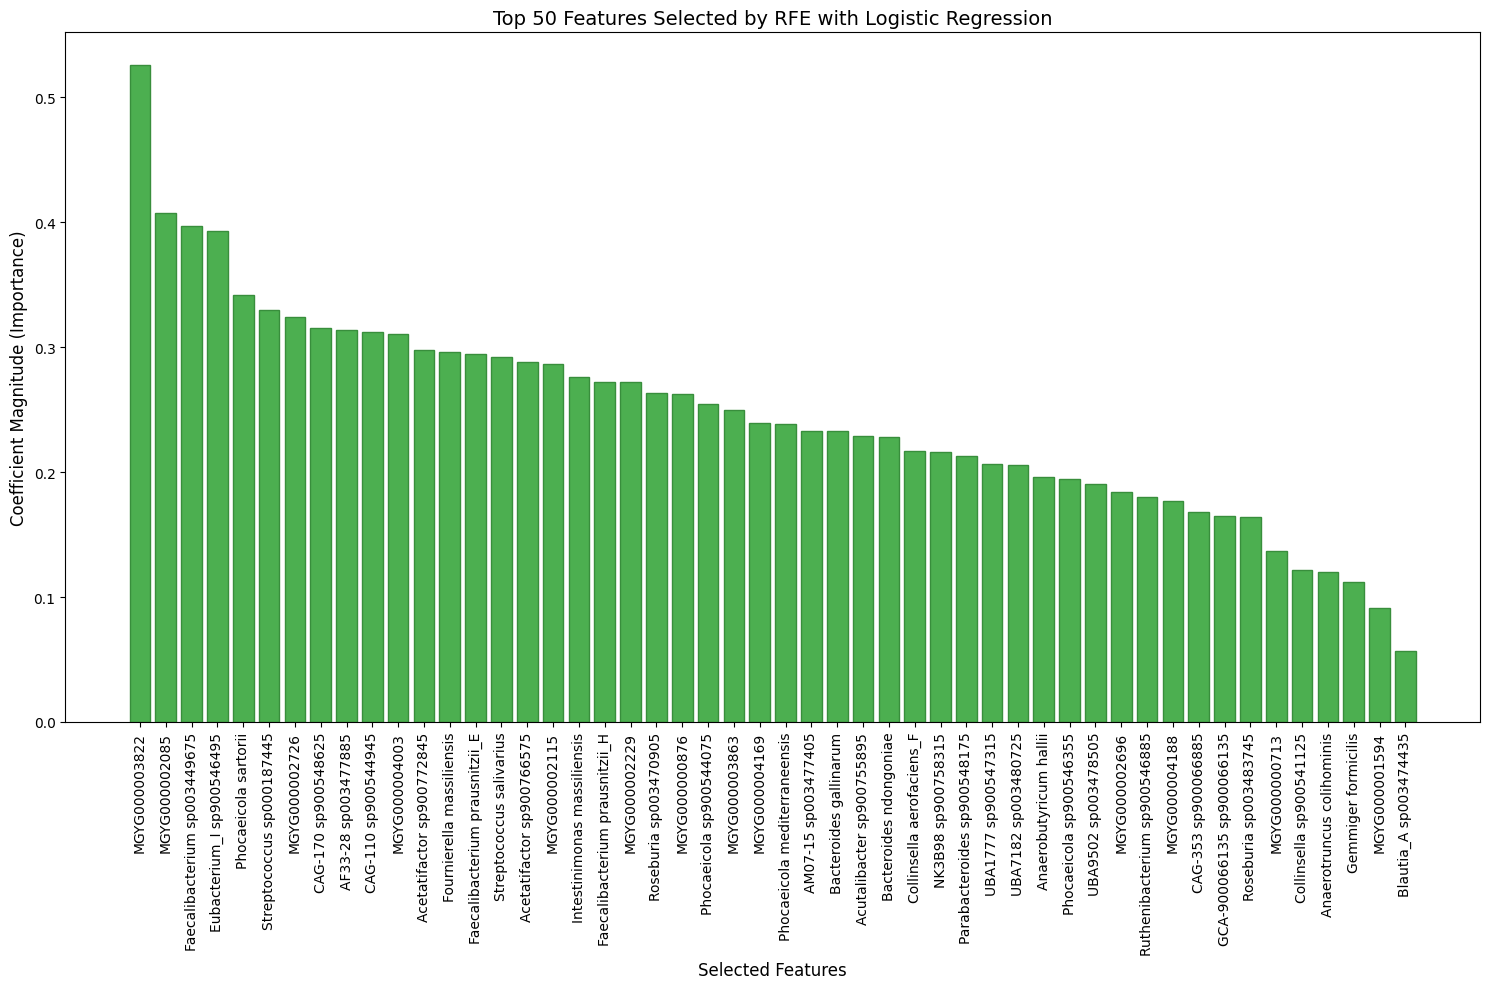

In [28]:
# Fit Logistic Regression on the selected features to get coefficients
model_lr_fitted = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)
model_lr_fitted.fit(X_rfe, y)
coefficients = np.abs(model_lr_fitted.coef_[0])  # Absolute values for importance

# Extracts the learned coefficients from the model.
# model_lr_fitted.coef_ returns a 2D array (since scikit-learn expects multi-class by default).
# [0] selects the coefficients for the binary classification case.
# Takes the absolute value of the coefficients:
# Why? Because in feature importance, we often care about the magnitude of the effect, not the direction (positive or negative).

# Create DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': selected_features_rfe,
    'Importance': coefficients
})

# Sort by importance for better visualization
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(15, 10))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='#4CAF50', edgecolor='#388E3C')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Selected Features', fontsize=12)
plt.ylabel('Coefficient Magnitude (Importance)', fontsize=12)
plt.title('Top 50 Features Selected by RFE with Logistic Regression', fontsize=14)
plt.tight_layout()
plt.show()

In [29]:
# 5. Feature Importance from Random Forest (Embedded Method)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X, y)
selector_rf = SelectFromModel(model_rf, prefit=True, threshold="mean")

# SelectFromModel: A meta-transformer that selects features based on feature importance provided by an estimator (here, the random forest).
# model_rf: The pre-trained Random Forest model is already fitted, so prefit=True.
# threshold="mean": Select features whose importance is above the mean importance.

X_rf = selector_rf.transform(X)#Apply the selector to X to retain only the most important features.
selected_features_rf = X.columns[selector_rf.get_support()]
X_rf_df = pd.DataFrame(X_rf, columns=selected_features_rf)
print(f"Selected features using RF importance (threshold=mean): {len(selected_features_rf)}")


Selected features using RF importance (threshold=mean): 353


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:

# 6. L1 Regularization (Lasso) for Feature Selection (Embedded Method)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)
selected_features_lasso = X.columns[lasso.coef_ != 0]
# lasso.coef_: Array of feature coefficients after training.
# We filter the columns where the coefficient is non-zero (important features).
# The result is a list of selected important feature names that have predictive power
X_lasso = X[selected_features_lasso]


In [31]:
# Prepare datasets for modeling
datasets = {
    'Original': X,
    'Variance_Threshold': X_var_df,
    'ANOVA': X_anova_df,
    'Mutual_Info': X_mi_df,
    'RFE': X_rfe_df,
    'RF_Importance': X_rf_df,
    'Lasso': X_lasso
}

# Model Building and Evaluation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}
# Each value is created by make_scorer()
#  which wraps standard metric functions from sklearn.metrics to make them compatible with model evaluation tools
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Perform cross-validation
results = {}
for ds_name, ds_X in datasets.items():
    results[ds_name] = {}
    for model_name, model in models.items():
        cv_results = cross_validate(model, ds_X, y, cv=5, scoring=scoring)
        results[ds_name][model_name] = {
            'Accuracy': cv_results['test_accuracy'].mean(),
            'Precision': cv_results['test_precision'].mean(),
            'Recall': cv_results['test_recall'].mean(),
            'F1': cv_results['test_f1'].mean(),
            'ROC_AUC': cv_results['test_roc_auc'].mean()
        }
        print(f"Completed {model_name} on {ds_name}")

# Model Comparison
comparison_data = []
for ds_name, ds_results in results.items():
    for model_name, metrics in ds_results.items():
        row = {'Dataset': ds_name, 'Model': model_name}
        row.update(metrics)
        comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison Table:")
print(comparison_df)



Completed LogisticRegression on Original
Completed RandomForest on Original
Completed SVM on Original
Completed LogisticRegression on Variance_Threshold
Completed RandomForest on Variance_Threshold
Completed SVM on Variance_Threshold
Completed LogisticRegression on ANOVA
Completed RandomForest on ANOVA
Completed SVM on ANOVA
Completed LogisticRegression on Mutual_Info
Completed RandomForest on Mutual_Info
Completed SVM on Mutual_Info
Completed LogisticRegression on RFE
Completed RandomForest on RFE
Completed SVM on RFE
Completed LogisticRegression on RF_Importance
Completed RandomForest on RF_Importance
Completed SVM on RF_Importance
Completed LogisticRegression on Lasso
Completed RandomForest on Lasso
Completed SVM on Lasso

Model Comparison Table:
               Dataset               Model  Accuracy  Precision    Recall  \
0             Original  LogisticRegression  0.505263   0.505897  0.481149   
1             Original        RandomForest  0.486577   0.486002  0.450889   
2        

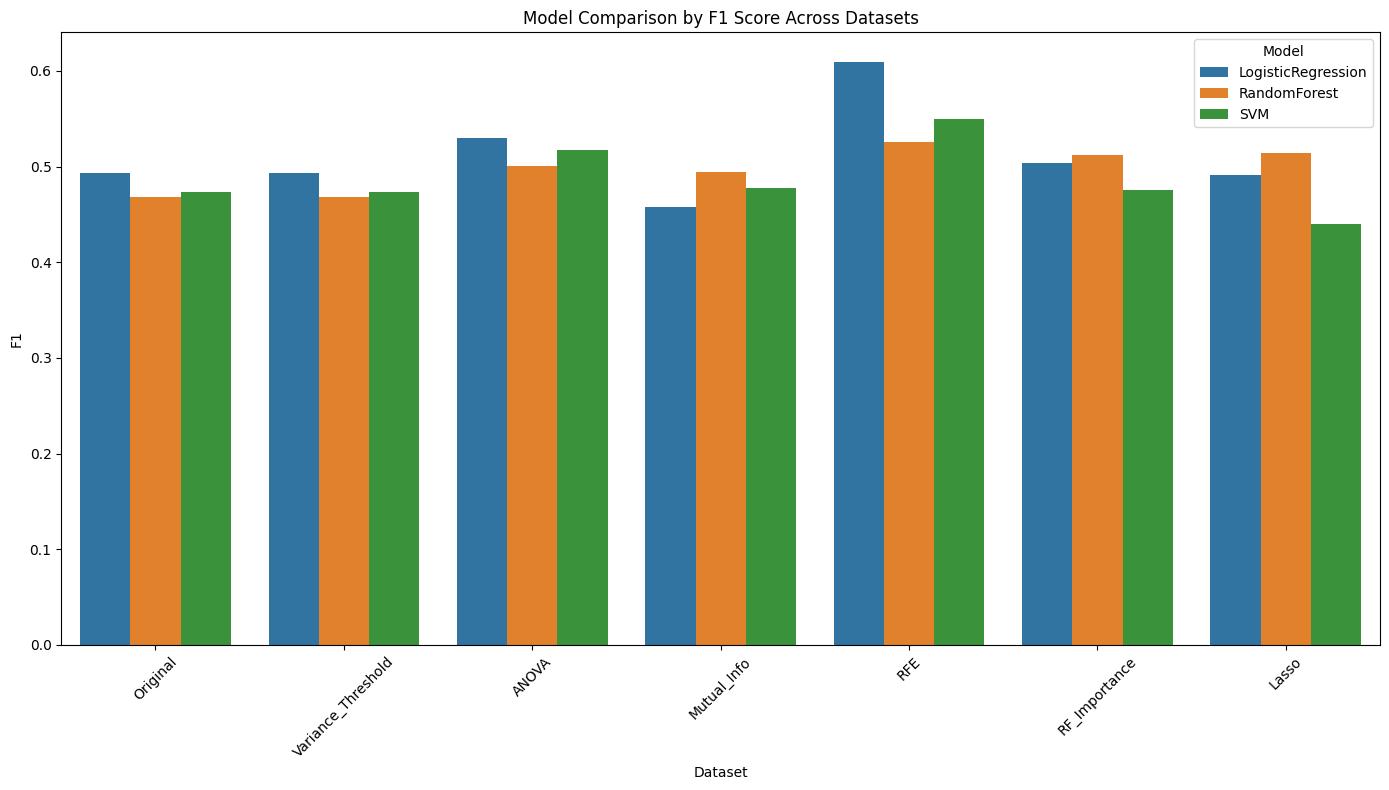

In [32]:

# Visualize comparison (Bar plot for F1 scores)
plt.figure(figsize=(14, 8))
sns.barplot(data=comparison_df, x='Dataset', y='F1', hue='Model')
plt.title('Model Comparison by F1 Score Across Datasets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


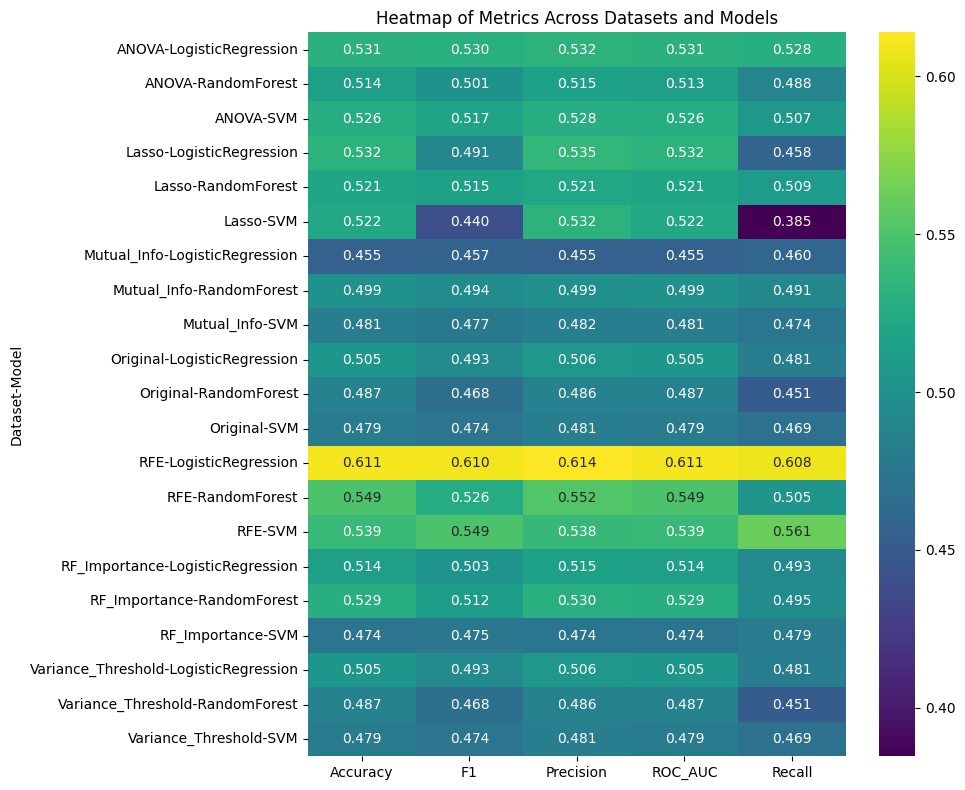

In [33]:
# Heatmap for all metrics
pivot_df = comparison_df.pivot_table(index=['Dataset', 'Model'], values=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC'])
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.3f')
plt.title('Heatmap of Metrics Across Datasets and Models')
plt.tight_layout()
plt.show()